# Read Data

In [1]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')
s=set()
s=list(s)
# Only select two values in the dependent variable to make it binary classification problem
# Only pick 2 feature in order to make easier for modelling and visulisation
df=df[df['variety'].isin(['Setosa', 'Versicolor'])]
df=df[['sepal.length','petal.length', 'variety']]
df.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


In [26]:
from sklearn.preprocessing import MinMaxScaler
# Impute the target variable with [-1,1]
df=df.replace(regex={'Setosa': -1, 'Versicolor': 1})
Y=df.loc[:, 'variety']
X=df.iloc[:, :2]
# Normalize it
X_normalized=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X_normalized)
# Insert a constant value for intercept b
X.insert(loc=len(X.columns), column='intercept', value=1)
# Let's split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42)

# Gradient Descent

In [3]:
# SVM Loss Function

<img src="SVM Loss Function.png" width="608" height="456" style="float:left"/>

In [4]:
import numpy as np
from sklearn.utils import shuffle
def cost_function(W, X, Y):
    # hinge loss (missclassification loss)
    N=X.shape[0]
    distances=1-Y*(np.dot(X, W))
    distances[distances<0]=0 # this is represent the max(0, distances)
    hinge_loss=reg_strength*(np.sum(distances)/N)
    
    # Cost (margin width + hinge loss)
    cost=1/2*np.dot(W, W) + hinge_loss
    return cost

In [5]:
# We would use Stochastic Gradient Descent or SGD to get optimum. For SVM we could always get global optimum
# Gradient descent algorithm works as follows:
# 1. Find the gradient of cost function i.e. ∇J(w’)
# 2. Move opposite to the gradient by a certain rate i.e. w’ = w’ — ∝(∇J(w’))
# 3. Repeat step 1–3 until convergence i.e we found w’ where J(w) is smallest

# The gradient descent of cost function
def calculate_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch) == np.int64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        if max(0,d)==0:
            di=W
        else:
            di=W-(reg_strength * Y_batch[ind] * X_batch[ind])
        dw+=di
    
    dw=dw/len(Y_batch) # average cost
    return dw

In [6]:
# Define SGD iteration function
def sgd(features, outputs):
    epoch_list=[]
    cost_list=[]
    max_epochs=2000
    weights=np.zeros(features.shape[1])
    nth=0
    prev_cost = float("inf")
    cost_threshold = 0.01
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y=shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent=calculate_cost_gradient(weights, x, Y[ind])
            weights=weights-(learning_rate*ascent)
        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = cost_function(weights, features, outputs)
            cost_list.append(cost)
            epoch_list.append(epoch)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            print("W is {}".format(weights))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights, cost_list, epoch_list
            prev_cost = cost
            nth += 1
    return weights, cost_list, epoch_list

# Train the Model

In [7]:
reg_strength=10000
learning_rate = 0.00001
W, Cost, Epoch= sgd(x_train.to_numpy(), y_train.to_numpy())

Epoch is:1 and Cost is: 2506.451873000058
W is [ 0.65152112  1.92101713 -1.19973101]
Epoch is:2 and Cost is: 705.6006217836884
W is [ 0.79526384  2.95044029 -1.59845778]
Epoch is:4 and Cost is: 345.14050495382344
W is [ 0.75312757  3.77115491 -1.79535131]
Epoch is:8 and Cost is: 199.00493108455
W is [ 0.6394916   4.53185803 -1.8884902 ]
Epoch is:16 and Cost is: 81.08977722743812
W is [ 0.41369952  5.32288839 -2.07390479]
Epoch is:32 and Cost is: 62.1429646845039
W is [ 0.30895068  5.91466586 -2.24211486]
Epoch is:64 and Cost is: 52.69072003706911
W is [ 0.40553042  6.56847313 -2.57380493]
Epoch is:128 and Cost is: 30.125892623000528
W is [ 0.69334603  7.23656475 -2.72087986]
Epoch is:256 and Cost is: 34.14628346057076
W is [ 0.86941285  7.2022103  -2.70439542]
Epoch is:512 and Cost is: 30.28041334994466
W is [ 0.85015433  7.22228275 -2.77068515]
Epoch is:1024 and Cost is: 35.155600194102206
W is [ 0.88150735  7.16671433 -2.8035516 ]
Epoch is:1999 and Cost is: 30.668746193323685
W is [ 

In [8]:
Cost

[2506.451873000058,
 705.6006217836884,
 345.14050495382344,
 199.00493108455,
 81.08977722743812,
 62.1429646845039,
 52.69072003706911,
 30.125892623000528,
 34.14628346057076,
 30.28041334994466,
 35.155600194102206,
 30.668746193323685]

In [9]:
Epoch

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1999]

In [10]:
W

array([ 0.84603759,  7.26954882, -2.78843552])

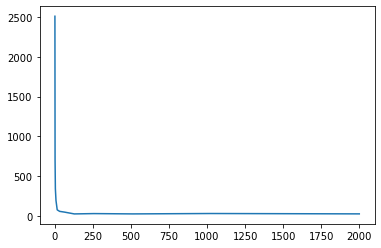

In [13]:
# Plot the train cost result
import matplotlib.pyplot as plt 
plt.plot(Epoch, Cost, label='train_cost' )

# Plot SVP Result

In [14]:
a=W[0]/W[1]
b=W[2]/W[1]

In [15]:
a

0.1163810315116895

In [16]:
b

-0.3835775218225629

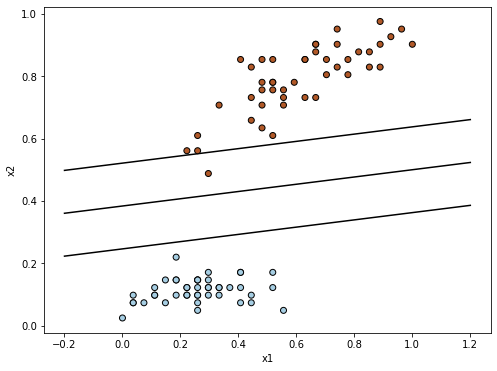

In [17]:
xx = np.linspace(-0.2, 1.2)
yy = a * xx-b
margin = 1 / np.sqrt(np.sum(W[0:2] ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(x_train[0], x_train[1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Test the model

In [18]:
# testing the model on test set
y_test_predicted = np.array([])
for i in range(x_test.shape[0]):
    yp = np.sign(np.dot(W, x_test.to_numpy()[i])) #model
    y_test_predicted = np.append(y_test_predicted, yp)

from sklearn.metrics import accuracy_score, recall_score
print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))

accuracy on test dataset: 1.0
recall on test dataset: 1.0
precision on test dataset: 1.0


# Let's Use PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [2]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')
s=set()
s=list(s)
# Only select two values in the dependent variable to make it binary classification problem
# Only pick 2 feature in order to make easier for modelling and visulisation
df=df[df['variety'].isin(['Setosa', 'Versicolor'])]
df=df[['sepal.length','petal.length', 'variety']]
df.head()
from sklearn.preprocessing import MinMaxScaler
# Impute the target variable with [-1,1]
df=df.replace(regex={'Setosa': -1, 'Versicolor': 1})
Y=df.loc[:, 'variety']
X=df.iloc[:, :2]
# Normalize it
X_normalized=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X_normalized)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42)

In [63]:
"""
Linear Support Vector Machine
-----------------------------
This SVM is a subclass of the PyTorch nn module that
implements the Linear  function. The  size  of  each 
input sample is 2 and output sample  is 1.
"""
# class SVM(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fully_connected=nn.Linear(2,1)
#     def forward(self,x):
#         fwd=self.fully_connected(x)
#         return fwd

In [78]:
learning_rate = 0.1
epoch=100
batch_size=1

In [79]:
x_train_torch=torch.FloatTensor(x_train.to_numpy())
y_train_torch=torch.FloatTensor(y_train.to_numpy())
N=len(y_train_torch)

In [80]:
model=nn.Linear(2,1)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
model.train()

Linear(in_features=2, out_features=1, bias=True)

In [81]:
nth=0
for epoch in range(epoch):
    perm=torch.randperm(N)
    sum_loss=0
    
    for i in range(0, N, batch_size):
        x=x_train_torch[perm[i:i + batch_size]] # Pick a random x
        y=y_train_torch[perm[i:i + batch_size]]
        
        x = Variable(x)  # Convert features and classes to variables
        y = Variable(y)
        
        optimizer.zero_grad()
        output=model(x)
        
        loss=torch.mean(torch.clamp(1 - output * y, min=0))  # hinge loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize and adjust weights
        
        sum_loss += loss.data.cpu().numpy()  # Add the loss
    
    if epoch == 2 ** nth:
        print("Epoch {}, Loss: {}".format(epoch, sum_loss)) 
        print(model.weight)
        nth+=1

Epoch 1, Loss: 13.41174203157425
Parameter containing:
tensor([[0.7383, 3.0856]], requires_grad=True)
Epoch 2, Loss: 5.406092941761017
Parameter containing:
tensor([[0.6864, 3.5442]], requires_grad=True)
Epoch 4, Loss: 3.250734567642212
Parameter containing:
tensor([[0.6346, 4.0710]], requires_grad=True)
Epoch 8, Loss: 1.8001751899719238
Parameter containing:
tensor([[0.4568, 4.7027]], requires_grad=True)
Epoch 16, Loss: 0.9127144813537598
Parameter containing:
tensor([[0.2161, 5.4466]], requires_grad=True)
Epoch 32, Loss: 0.4218943119049072
Parameter containing:
tensor([[0.1975, 6.0369]], requires_grad=True)
Epoch 64, Loss: 0.2502528429031372
Parameter containing:
tensor([[0.4198, 6.8125]], requires_grad=True)


In [90]:
# Get the W vector
W=model.weight.squeeze().detach().cpu().numpy()
# Get bias b
bias = model.bias.squeeze().detach().cpu().numpy()

In [91]:
a=W[0]/W[1]
b=bias/W[1]

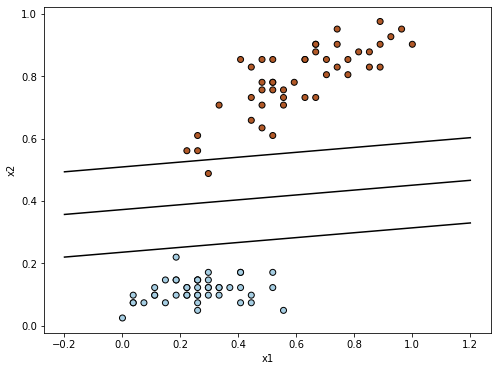

In [97]:
import numpy as np
import matplotlib.pyplot as plt 
xx = np.linspace(-0.2, 1.2)
yy = a * xx-b
margin = 1 / np.sqrt(np.sum(W ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(x_train[0], x_train[1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()